<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task3/Task3__Classification_model_Decision_Tree_dan_k_NN_Credit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Decision Tree


In [7]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Step 1: Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/CreditDataset.csv')

In [10]:
# Step 2: Preprocessing data
# Mengubah fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df.columns[:-1]:  # Mengabaikan kolom target ('Class')
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [11]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Class', axis=1)
y = LabelEncoder().fit_transform(df['Class'])

In [12]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
# Memprediksi menggunakan model Decision Tree
y_pred_dt = dt_model.predict(X_test)

In [15]:
# Evaluasi model Decision Tree
print("--- Decision Tree ---")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("Presisi:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_dt))


--- Decision Tree ---
Akurasi: 0.73
Presisi: 0.7124855576951563
Recall: 0.73
F1 Score: 0.7160718515594158

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       141
           1       0.56      0.41      0.47        59

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.71      0.73      0.72       200



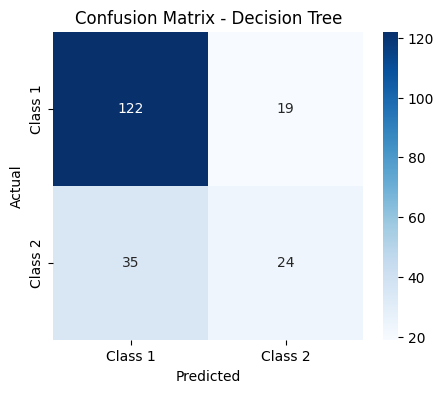

In [16]:
# Menampilkan Confusion Matrix untuk model Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 1", "Class 2"], yticklabels=["Class 1", "Class 2"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Menghitung dan menampilkan ROC curve dan AUC untuk model Decision Tree
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

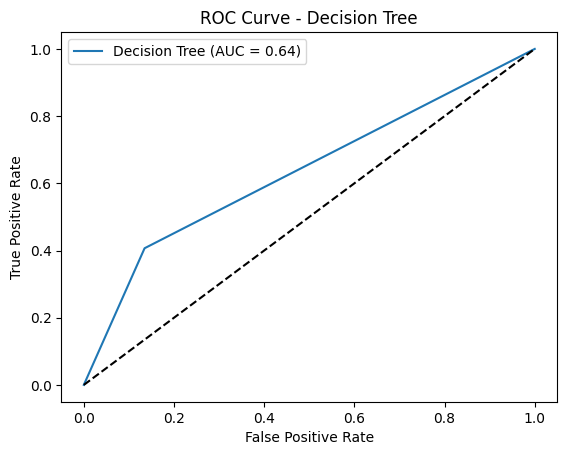

In [18]:
# Menampilkan ROC Curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

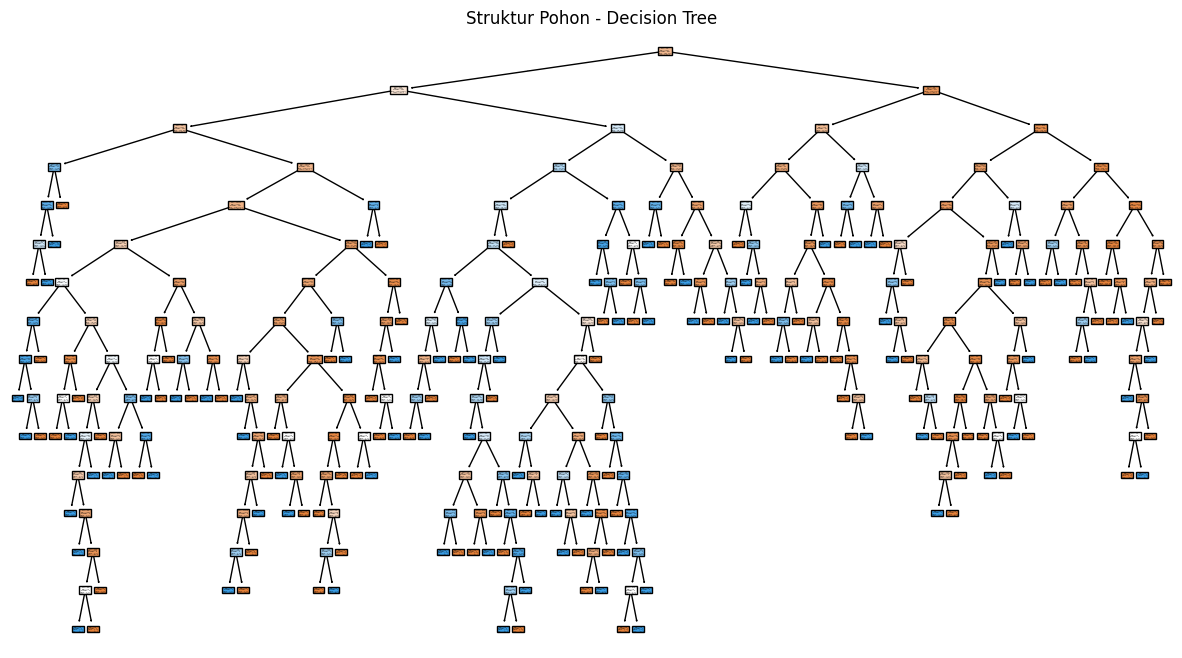

In [19]:
# Visualisasi struktur Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Class 1", "Class 2"], filled=True)
plt.title("Struktur Pohon - Decision Tree")
plt.show()

## k-Nearest Neighbors (k-NN)

In [20]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Step 1: Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/CreditDataset.csv')

In [22]:
# Step 2: Preprocessing data
# Mengubah fitur kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for column in df.columns[:-1]:  # Mengabaikan kolom target ('Class')
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [23]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Class', axis=1)
y = LabelEncoder().fit_transform(df['Class'])

In [24]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Melakukan normalisasi pada fitur untuk k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Melatih model k-NN dengan k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
# Memprediksi menggunakan model k-NN
y_pred_knn = knn_model.predict(X_test_scaled)

In [32]:
# Evaluasi model k-NN
print("--- k-NN ---")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("Presisi:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_knn))

--- k-NN ---
Akurasi: 0.77
Presisi: 0.758630012701869
Recall: 0.77
F1 Score: 0.7472077922077922

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       141
           1       0.70      0.39      0.50        59

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200



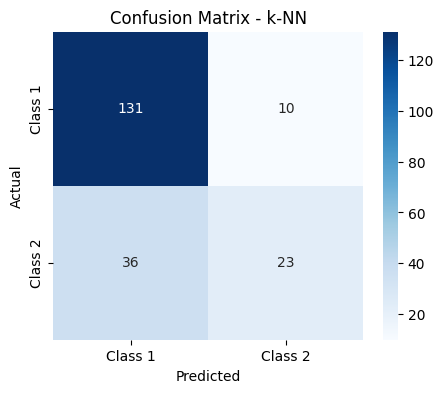

In [33]:
# Menampilkan Confusion Matrix untuk model k-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 1", "Class 2"], yticklabels=["Class 1", "Class 2"])
plt.title("Confusion Matrix - k-NN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Menghitung dan menampilkan ROC curve dan AUC untuk model k-NN
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)


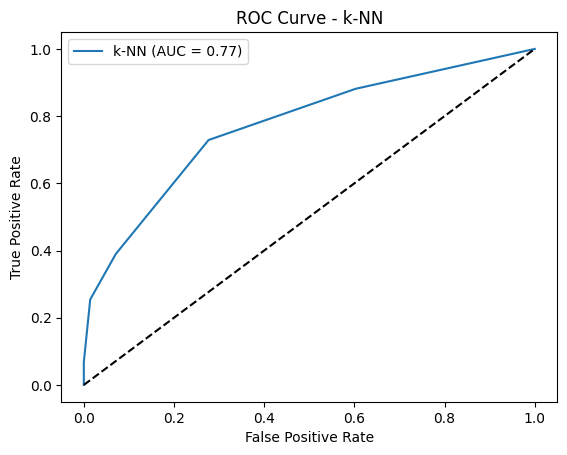

In [35]:
# Menampilkan ROC Curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - k-NN")
plt.legend()
plt.show()